# Exploratory Data Analysis Marketing Campaign
The analysis will focus on consumers and their general profiles based on key indicators such as: <br>
• Age.<br>
• Income.<br>
• Education.<br>
• Products bought.<br>

## 1. Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read Data set
### Visual Analysis of the Data:
1. We can see that the CSV file is delimited by semicolons (;).
2. The data appears to be user records.
3. It includes personal information such as education, age, marital status, and children at home.
4. It also contains relevant data like types of products purchased (meat, fruits, sweets, golden products...).
5. It records a boolean for AcceptedCmp from 1 to 5.

In [3]:
df = pd.read_csv('marketing_campaign.csv',delimiter=";")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


#### Data Cleaning
1. The "income" column has 24 null values. We will replace them with the average of the total salary.

In [4]:
# identify nulls
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

# Fill nulls in column " Income" with the average.
df['Income'] = df['Income'].fillna(df['Income'].mean())
null_counts2 = df.isnull().sum()
print(null_counts2[null_counts > 0])


Income    24
dtype: int64
Income    0
dtype: int64


#### Visualizations

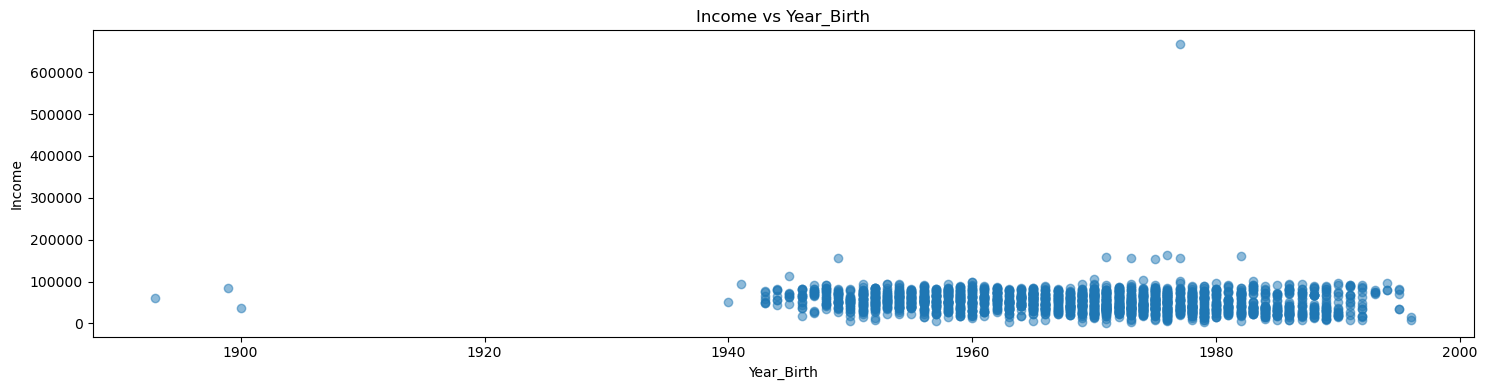

In [5]:
# Scatterplot de Income vs Year_Birth to see the trends.
plt.figure(figsize=(15, 4))
plt.scatter(df['Year_Birth'], df['Income'], alpha=0.5)
plt.title('Income vs Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

In the chart above, we can observe that most consumers were born after 1940. Therefore, we can assume that data from before 1900 is invalid, as well as the outlier earning more than 200,000.


In [6]:
# Remove outliers.
df = df[(df['Year_Birth'] >= 1940) & (df['Income'] <= 200000)]

We created new charts to analyze the consumers.


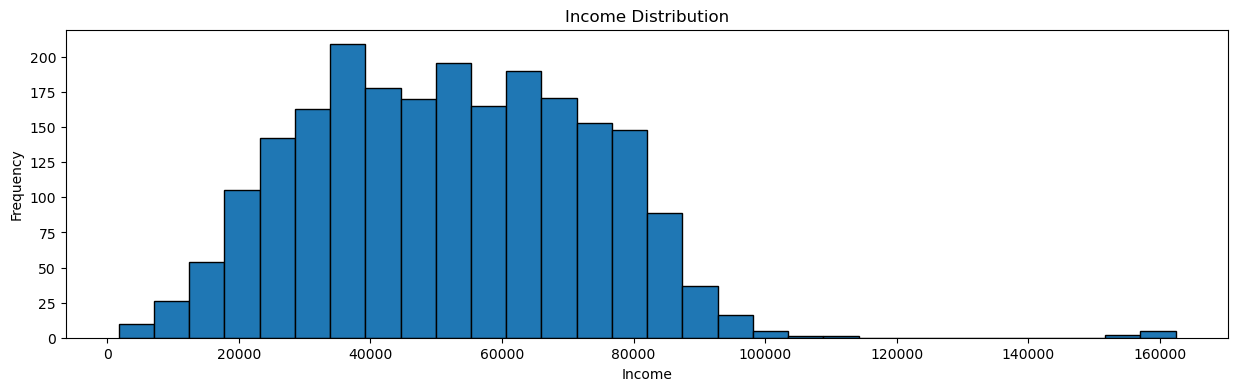

Analysis: The average income ranges between 30,000 and 70,000.


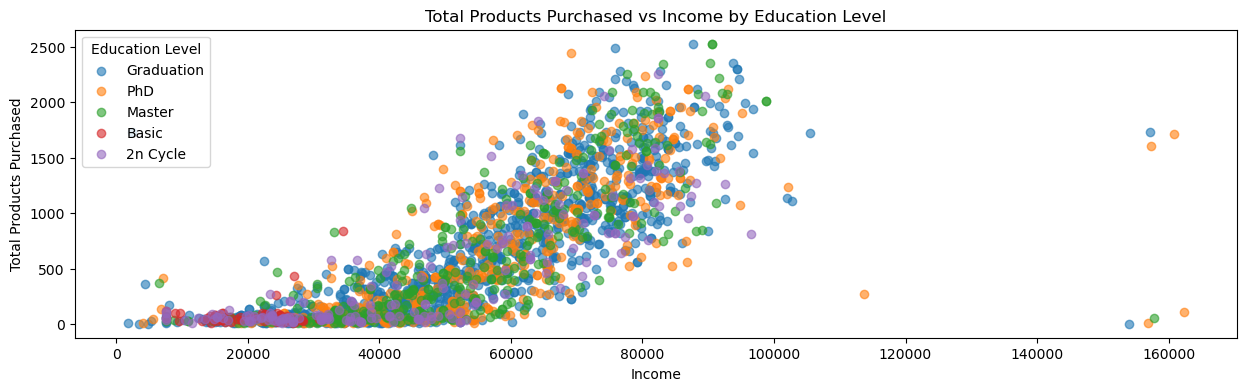

Analysis: There is no clear relationship indicating that education impacts income or products purchased.


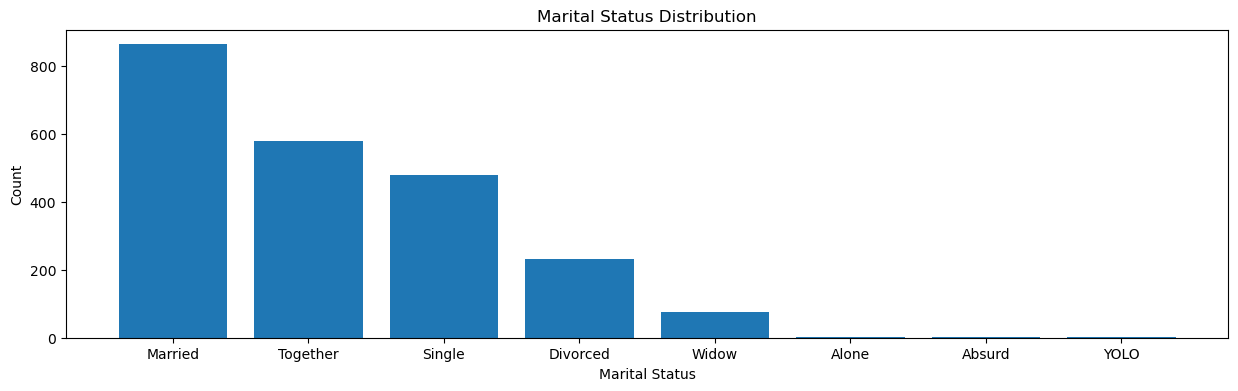

Analysis: Consumers with a partner tend to spend more.


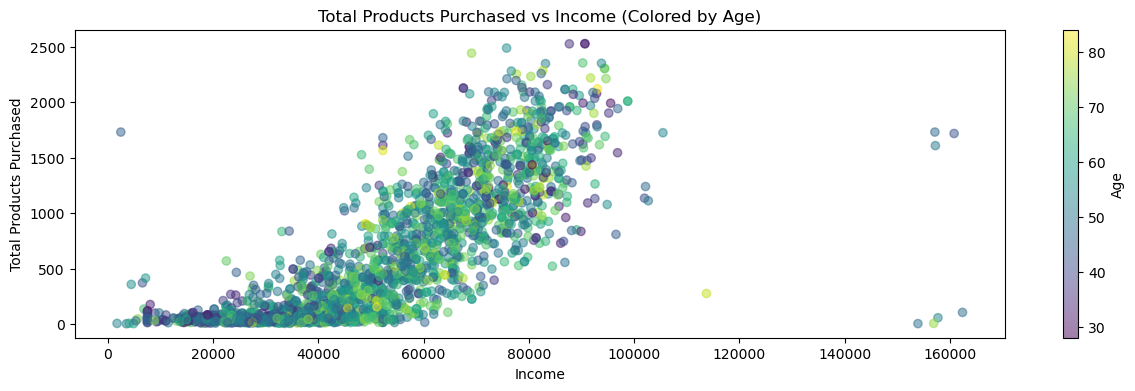

Analysis: Consumers with an income between 50,000 and 90,000 are the ones who purchase the most products.
          There is no clear difference indicating that age affects the products purchased.


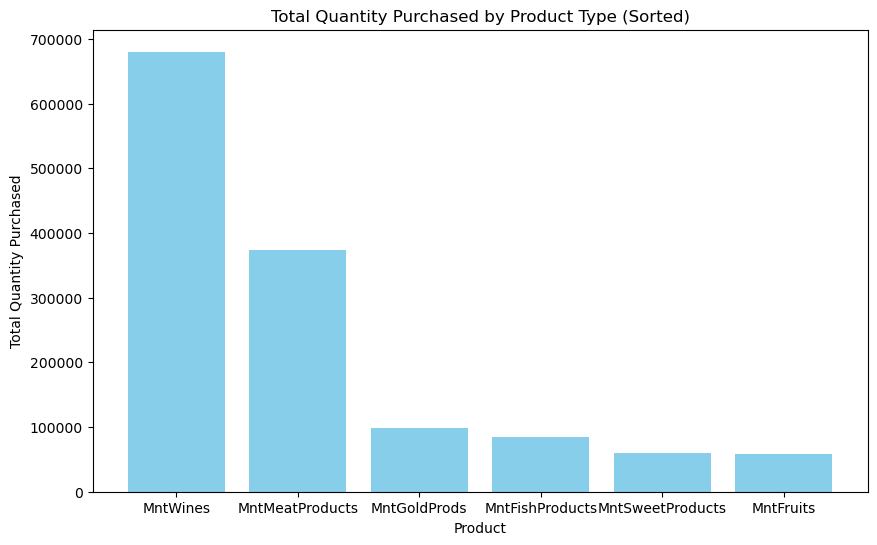

Analysis: The most sold product is wine, followed by meat.


In [9]:
# Income Histogram
plt.figure(figsize=(15, 4))
plt.hist(df['Income'], bins=30, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.show()
print("Analysis: The average income ranges between 30,000 and 70,000.")

# Calculate Total_Products as the sum of all product-related columns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df.loc[:, 'Total_Products'] = df[product_columns].sum(axis=1)  # Explicit use of .loc to avoid warnings

# Scatterplot of Total_Products vs Income by educational level
plt.figure(figsize=(15, 4))
education_levels = df['Education'].unique()
for level in education_levels:
    subset = df[df['Education'] == level]
    plt.scatter(subset['Income'], subset['Total_Products'], label=level, alpha=0.6)

plt.title('Total Products Purchased vs Income by Education Level')
plt.xlabel('Income')
plt.ylabel('Total Products Purchased')
plt.legend(title='Education Level')

plt.show()
print("Analysis: There is no clear relationship indicating that education impacts income or products purchased.")

# Calculate the age by the year of birth.
df.loc[:, 'Age'] = 2024 - df['Year_Birth']  # Using the current year 2024 as reference

# 1. Marital status distribution.
plt.figure(figsize=(15, 4))
mstatus_count = df['Marital_Status'].value_counts()
plt.bar(mstatus_count.index, mstatus_count.values)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.show()
print("Analysis: Consumers with a partner tend to spend more.")

# 2. Scatterplot of Total Products Purchased vs Income, differentiated by Age (colors).
plt.figure(figsize=(15, 4))
sc = plt.scatter(df['Income'], df['Total_Products'], c=df['Age'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Age')
plt.title('Total Products Purchased vs Income (Colored by Age)')
plt.xlabel('Income')
plt.ylabel('Total Products Purchased')

plt.show()
print("Analysis: Consumers with an income between 50,000 and 90,000 are the ones who purchase the most products.")
print("          There is no clear difference indicating that age affects the products purchased.")

# Total SUM of each product type.
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_totals = df[product_columns].sum()

# Sort SUMs descending
product_totals_sorted = product_totals.sort_values(ascending=False)

# Bar Graph of the sorted product sums
plt.figure(figsize=(10, 6))
plt.bar(product_totals_sorted.index, product_totals_sorted.values, color='skyblue')
plt.title('Total Quantity Purchased by Product Type (Sorted)')
plt.xlabel('Product')
plt.ylabel('Total Quantity Purchased')

# Most bought product
most_purchased_product = product_totals_sorted.idxmax()
most_purchased_value = product_totals_sorted.max()

plt.show()
print("Analysis: The most sold product is wine, followed by meat.")


### Basic Statistic Analysis

In [ ]:
# Calculate Descriptive Statistics for Total Products and Income

statistics = {
    'Variable': ['Total_Products', 'Income'],
    'Mean': [df['Total_Products'].mean(), df['Income'].mean()],
    'Median': [df['Total_Products'].median(), df['Income'].median()],
    'Mode': [df['Total_Products'].mode()[0], df['Income'].mode()[0]],
    'Standard Deviation': [df['Total_Products'].std(), df['Income'].std()],
    'Range': [df['Total_Products'].max() - df['Total_Products'].min(),
              df['Income'].max() - df['Income'].min()]
}

# Get DataFrame to visualize results
stats_df = pd.DataFrame(statistics)

stats_df


,Variable,Media,Mediana,Moda,Desviación Estándar,Rango
0,Total_Products,605.986583,396.5,46.000000,601.865156,2520.0
1,Income,51961.906544,51684.0,52247.251354,21411.404811,160667.0


### Total Products:
- **Mean (605.99)** and **Median (396.5)**: The mean is significantly higher than the median, suggesting a right-skewed distribution, possibly due to a few customers purchasing very high quantities of products.
- **Mode (46)**: This value represents the most frequent number of products purchased, indicating that a large portion of customers tends to make smaller purchases compared to the mean.
- **Standard Deviation (601.87)**: The high standard deviation confirms significant variability in the number of products purchased, with customers differing widely in their purchasing habits.
- **Range (2520)**: A wide range further highlights the data's dispersion, with some customers buying exceptionally high quantities compared to others.

### Income:
- **Mean (51,961.91)** and **Median (51,684)**: The mean and median are quite close, indicating a more symmetric distribution of income among customers.
- **Mode (52,247.25)**: The mode is close to the mean and median, confirming that most customers’ incomes fall within a middle range.
- **Standard Deviation (21,411.40)**: The relatively high standard deviation indicates variation in customers’ incomes, although not as pronounced as in the total products.
- **Range (160,667)**: This shows that customers have widely varying incomes, ranging from low to very high levels, though most appear to fall within a middle range.

### Statistics Analysis Observations:
- The data suggests that **total products purchased** vary greatly among customers, whereas **income** shows a more uniform distribution, albeit with some variation.
- The difference between the mean and median in products suggests that a few customers make very high purchases, skewing the mean towards higher values.
- For income, the closeness of the mean and median indicates that most customers fall within a similar income range, with fewer extreme outliers.


## Explore Relationships Between Variables

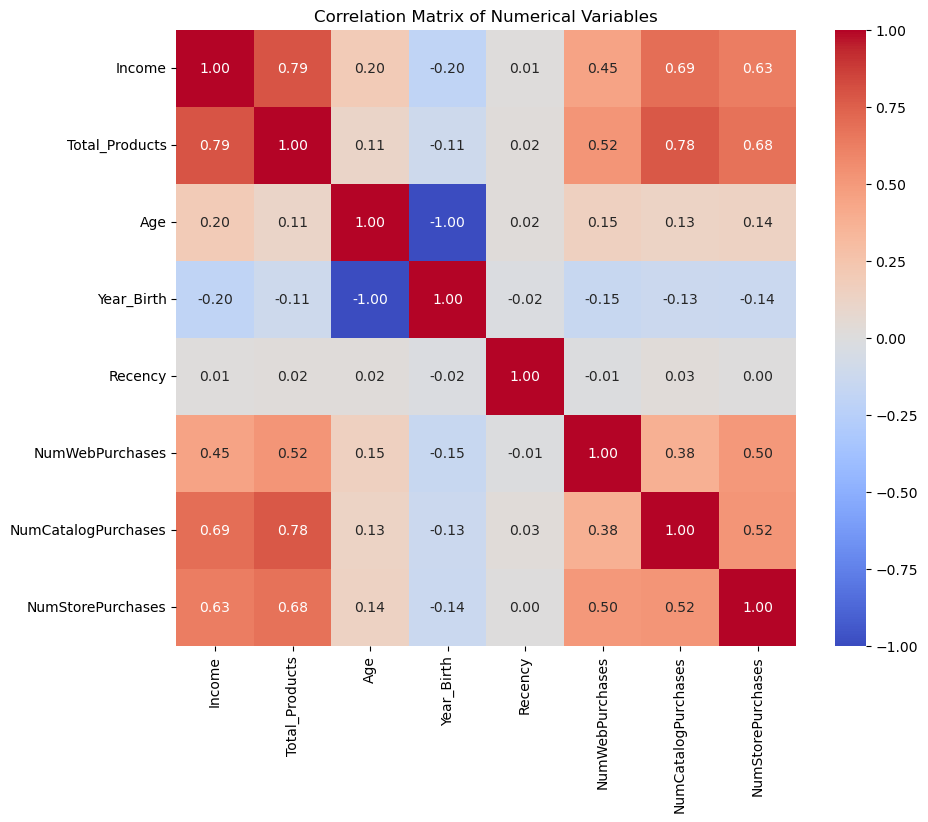

In [11]:
import seaborn as sns

# Calculate the correlation matrix for numerical variables in the filtered DataFrame
correlation_matrix = df[['Income', 'Total_Products', 'Age', 'Year_Birth', 'Recency', 
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


The heatmap of the **correlation matrix** shows the relationships between the main numerical variables in the dataset:

- **Income and Total_Products**: There is a moderate positive correlation. This suggests that income is related to the number of products purchased, but the relationship is not strong.
- **Age and Year_Birth**: The high negative correlation is expected since these variables are inversely proportional (year of birth and age).
- **NumWebPurchases, NumCatalogPurchases, and NumStorePurchases**: These variables show positive correlations with each other, indicating that consumers who purchase in one mode also tend to purchase in others.

### Conclusion:
The exploratory data analysis highlights several key insights into consumer behavior and dataset characteristics:

1. **Product Purchases**:
   - The total number of products purchased varies widely, with a small subset of customers making significantly larger purchases, skewing the distribution. Most customers make smaller purchases.
   - Wine and meat are the most popular product categories, suggesting they drive the bulk of sales.

2. **Income Distribution**:
   - The income distribution is relatively symmetric, with most customers earning between 30,000 and 70,000. There is some variation, but extreme income levels are less frequent.

3. **Consumer Demographics**:
   - Most customers were born after 1940, and data for earlier birth years appears invalid or irrelevant.
   - Customers with partners tend to spend more, suggesting household dynamics may influence purchasing behavior.

4. **Relationships Between Variables**:
   - A moderate positive correlation exists between income and total products purchased, suggesting higher income may influence buying power but is not the sole driver.
   - Strong correlations between purchase modes (web, catalog, store) suggest that consumers are likely to engage in multiple channels rather than sticking to just one.
   - The inverse relationship between age and year of birth validates the consistency of the data.

### Business Implications:
- **Targeting High-Income Customers**: While income correlates moderately with purchases, strategies targeting high-income segments might yield higher-value customers.
- **Channel Synergy**: Marketing efforts should leverage the interconnected nature of web, catalog, and store purchases to create seamless multi-channel experiences.
- **Product Prioritization**: Emphasis on popular categories like wine and meat could drive incremental sales.

This EDA provides a solid foundation for further analysis, such as clustering customer segments or predicting purchase behaviors, to inform data-driven business decisions.
